[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

#Pregunta1-1. Aprendizaje No Supervisado. Dataset 110 cargado sin etiquetas 'y'

En el aprendizaje no supervisado, el entrenamiento se hace en datos que no tienen etiquetas.\
Para ello, los datos son agrupados en conjuntos o clústeres basados en la similitud entre ellos.

##1. Modelo K-Means

###1.1. Generación de 5 Clústers mediante datos de las 2 primeras características de nuestro dataset: Pureza de la Miel
El dataset contiene un total de 247903 Ejemplos con diez diferentes características de miel. Se desea clasificar en diferentes categorías que significarán diferentes purezas de la miel.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 2.81,  1.75],
     [9.47 ,  1.82],
     [4.61,  1.84],
     [1.77,  1.4],
     [6.11,  1.25]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])              #Desviación estándar de los clústeres. Qué tan dispersos están los puntos dentro de cada clúster
                                                            #alrededor de su centro respectivo

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)     #Función make_blobs genera datos sintéticos. Se generan 2000 muestras (n_samples) distribuidas entre los 5 clústeres (blob_centers).
                                                            #La función devuelve dos matrices: X (características de los puntos generados), y (etiquetas de clúster correspondientes a cada punto)
                                                            #En nuestro caso las etiquetas 'y' no se van a utilizar.

In [2]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):                               #y=None, los puntos no están etiquetados y se visualizan sólo como puntos
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

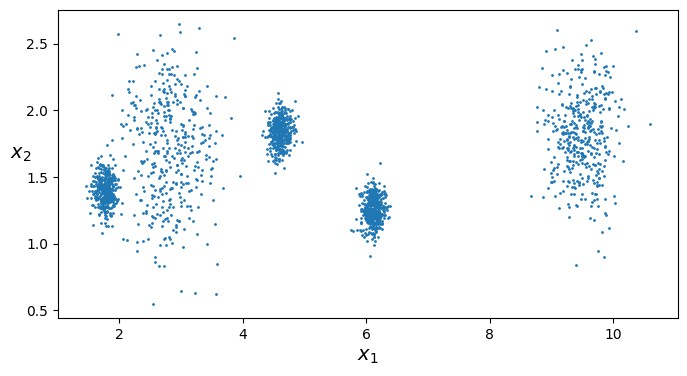

In [3]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

###1.2 Implementación del algoritmo de K-Means

In [4]:
from sklearn.cluster import KMeans                   #Importación de la Clase KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)                       #Con fit_predict() ajusta el modelo K-Means a los datos X. Primero ajusta el modelo a los datos,
                                                     #luego predice las etiquetas de clúster para cada muestra en X.

y_pred                                               #Etiquetas de clúster predichas para cada X. [2,4,3....] -> El primer ejemplo se asigna al tercer clúster(2).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 4, ..., 1, 4, 3], dtype=int32)

###Centros de los clústeres encontrados por el algoritmo K-Means

In [5]:
kmeans.cluster_centers_

array([[9.48705221, 1.80935087],
       [1.80198493, 1.4056871 ],
       [6.10977791, 1.25135806],
       [4.59535876, 1.84226425],
       [2.86001314, 1.72176037]])

###Definición de un conjunto de datos X_new (cuatro muestras) para las cuales se desea predecir los clústeres.

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 4, 1, 1], dtype=int32)

###Visualización de los resultados del Clustering

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

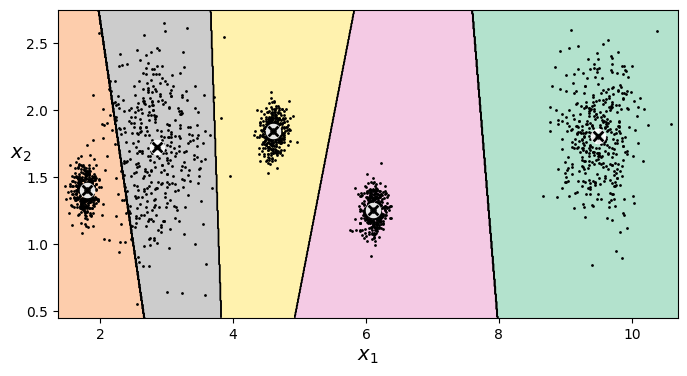

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

##1. Preprocesamiento del Dataset con Pandas

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1 Librerías

In [10]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Libreria pandas y scikitlearn para el preprocesamiento de datasets
import pandas as pd
import sklearn as skl

##1.2 Contenido del Dataset
En primer lugar, el contenido del dataset se carga en "dataframe", el cual Panda utilizará como unidad de información.
Luego se muestra y describe con un resumen el contenido del dataframe.
El dataset contiene un total de 247903 Ejemplos con diez diferentes características de miel. Se desea clasificar en diferentes categorías que significarán diferentes purezas de la miel.

In [11]:
dataframe = pd.read_csv('/content/drive/MyDrive/SIS 420/Segundo Parcial 1/honey_purity_dataset.csv')
print(dataframe)
print(dataframe.describe())

          CS  Density     WC    pH    EC      F      G Pollen_analysis  \
0       2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry   
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa   
...      ...      ...    ...   ...   ...    ...    ...             ...   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82          Acacia   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07        Chestnut   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79         Avocado   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88        Lavender   

        Viscosity   Price  
0         4844.50  645.24  
1         6689.02  385.85  
2         6883.60  639.64  

##1.3. Preprocesamiento del dataset: Atributos con texto
En nuestro dataset tenemos 1 atributo NO NUMÉRICO el cual es "Pollen_analysis".

###Ahora, los atributos de texto de la característica "Pollen_analysis" lo cargamos en la variable Pollen_analysis_cat y lo mostramos.

In [12]:
Pollen_analysis_cat = dataframe[['Pollen_analysis']]
print(Pollen_analysis_cat.head(12))

   Pollen_analysis
0        Blueberry
1          Alfalfa
2         Chestnut
3        Blueberry
4          Alfalfa
5           Borage
6        Sunflower
7         Chestnut
8   Orange Blossom
9        Blueberry
10          Acacia
11          Tupelo


##Preprocesamiento con OneHotEncoder de sklearn
Ésto devuelve una codificación donde se indica el número de instancia dentro del dataset, número de atributo binario y el valor.
Con el método toarray() convertimos a una matriz y mostramos sus valores y tamaño (shape).

In [13]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
Pollen_analysis_cat_one_hot = one_hot_encoder.fit_transform(Pollen_analysis_cat)
print(Pollen_analysis_cat_one_hot.toarray().shape)
print(Pollen_analysis_cat_one_hot.toarray())

(247903, 19)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##Visualización de los nombres de todas las categorías de "Pollen_analysis"

In [14]:
# Visualizar los nombres de las categorías
categories = one_hot_encoder.categories_

# Dado que map_cat es una sola columna, categories_ será una lista de un solo elemento.
# Accedemos a este primer elemento para obtener las categorías
print(categories[0])

['Acacia' 'Alfalfa' 'Avocado' 'Blueberry' 'Borage' 'Buckwheat' 'Chestnut'
 'Clover' 'Eucalyptus' 'Heather' 'Lavender' 'Manuka' 'Orange Blossom'
 'Rosemary' 'Sage' 'Sunflower' 'Thyme' 'Tupelo' 'Wildflower']


###Crear un DataFrame para las características codificadas, concatenar con las características originales y mostrar

In [15]:
# Crear un DataFrame para las características codificadas
encoded_df = pd.DataFrame(Pollen_analysis_cat_one_hot.toarray(), columns=['Acacia', 'Alfalfa', 'Avocado', 'Blueberry', 'Borage', 'Buckwheat', 'Chestnut',
 'Clover', 'Eucalyptus', 'Heather', 'Lavender', 'Manuka', 'Orange Blossom',
 'Rosemary', 'Sage', 'Sunflower', 'Thyme', 'Tupelo', 'Wildflower'])

# Concatenar las características originales con las características codificadas
df_nuevo = pd.concat([dataframe, encoded_df], axis=1)

# Visualizar el nuevo DataFrame
print(df_nuevo.head())

     CS  Density     WC    pH    EC      F      G Pollen_analysis  Viscosity  \
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry    4844.50   
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa    6689.02   
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut    6883.60   
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry    7167.56   
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa    5125.44   

    Price  ...  Heather  Lavender  Manuka  Orange Blossom  Rosemary  Sage  \
0  645.24  ...      0.0       0.0     0.0             0.0       0.0   0.0   
1  385.85  ...      0.0       0.0     0.0             0.0       0.0   0.0   
2  639.64  ...      0.0       0.0     0.0             0.0       0.0   0.0   
3  946.46  ...      0.0       0.0     0.0             0.0       0.0   0.0   
4  432.62  ...      0.0       0.0     0.0             0.0       0.0   0.0   

   Sunflower  Thyme  Tupelo  Wildflower  
0        0.0  

###Eliminar las características originales "Pollen_analysis" del df_nuevo

In [16]:
# Eliminar la característica 'map' y 'bomb_planted' de df_new:
df_nuevo_sin_Pollen_analysis = df_nuevo.drop(columns=['Pollen_analysis'])

# Visualizar el nuevo DataFrame sin las características 'map', 'bomb_planted'
print(df_nuevo_sin_Pollen_analysis.head())

     CS  Density     WC    pH    EC      F      G  Viscosity   Price  Acacia  \
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50  645.24     0.0   
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02  385.85     0.0   
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60  639.64     0.0   
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56  946.46     0.0   
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44  432.62     0.0   

   ...  Heather  Lavender  Manuka  Orange Blossom  Rosemary  Sage  Sunflower  \
0  ...      0.0       0.0     0.0             0.0       0.0   0.0        0.0   
1  ...      0.0       0.0     0.0             0.0       0.0   0.0        0.0   
2  ...      0.0       0.0     0.0             0.0       0.0   0.0        0.0   
3  ...      0.0       0.0     0.0             0.0       0.0   0.0        0.0   
4  ...      0.0       0.0     0.0             0.0       0.0   0.0        0.0   

   Thyme  Tupelo  Wildflower  
0    0.

##2. Aprendizaje no supervisado. Aplicación del modelo mini-batch K-Means

###2.2 División del conjunto de datos en conjuntos de entrenamiento (80% de los ejemplos) y prueba (20% de los ejemplos).
En pandas, para seleccionar filas y columnas específicas, se utiliza los métodos iloc[] o loc[].\
El método iloc[] se utiliza para seleccionar datos mediante la posición de las filas y columnas en el DataFrame.

In [17]:
# Cargar datos

# Definir X_train, X_test
X_train = df_nuevo_sin_Pollen_analysis.iloc[1:198001, 0:28]

X_test = df_nuevo_sin_Pollen_analysis.iloc[198001:, 0:28]

# Visualizar X_train
print(X_train)


          CS  Density     WC    pH    EC      F      G  Viscosity   Price  \
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02  385.85   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60  639.64   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56  946.46   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44  432.62   
5       2.17     1.35  20.67  4.11  0.75  27.19  43.54    3967.30  593.55   
...      ...      ...    ...   ...   ...    ...    ...        ...     ...   
197996  4.61     1.36  17.79  3.26  0.71  37.83  20.28    4616.43  321.85   
197997  8.02     1.21  18.91  3.40  0.85  34.32  22.09    6257.40  205.34   
197998  1.82     1.74  17.62  5.36  0.71  40.85  32.78    7232.91  842.77   
197999  6.97     1.60  19.66  6.23  0.89  37.97  39.17    6748.91  968.87   
198000  9.34     1.65  12.33  6.68  0.89  24.12  35.73    9148.51  606.29   

        Acacia  ...  Heather  Lavender  Manuka  Orange Blossom  Rosemary  \

###2.3 Función load_next_batch(batch_size)
Con ésta función se toma un tamaño del lote como entrada y se devuelve un lote aleatorio de datos de entrada del conjunto de datos X.\
Esto se hace para implementar el aprendizaje por lotes, se utilizará muestras de datos en lugar de todo el conjunto de datos a la vez.

In [18]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

###2.4 Entrenamiento de un modelo de agrupamiento utilizando el algoritmo Mini-Batch K-Means

In [19]:
from sklearn.cluster import MiniBatchKMeans

k = 5                                 #Número de clústeres (grupos) en los que se desea dividir los datos.
n_init = 10                           #Número de veces que se ejecutará el algoritmo con diferentes centroides iniciales. Se elige el modelo con la inercia más baja.
n_iterations = 100                    #Número total de iteraciones para entrenar el modelo Mini-Batch K-Means.
batch_size = 100                      #Tamaño del lote (batch) de muestras que se utilizará en cada iteración del entrenamiento.
init_size = 500                       #Tamaño del conjunto de datos de inicialización -> para inicializar los centroides iniciales del algoritmo.
evaluate_on_last_n_iters = 10         #Número de últimas iteraciones en las que se evaluará la inercia para determinar el mejor modelo.

best_kmeans = None                    #Variable best_kmeans: Va almacenar el mejor modelo Mini-Batch K-Means encontrado durante el bucle de inicialización

for init in range(n_init):            #Bucle de inicialización: Itera n_init veces para entrenar el modelo con diferentes centroides iniciales.
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init=1)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

##2.5 Modelo Mini-Batch K-Means encontrado para el entrenamiento
Se calcula la puntuación del mejor modelo Mini-Batch K-Means en relación con el conjunto de datos X. Ésto proporciona una medida de qué tan bien se ajustan los datos a los clústeres definidos por el modelo.\
La puntuación se calcula como la negativa de la inercia del modelo, que es una medida de la suma de las distancias cuadradas de las muestras a su centroide más cercano.\
Se prefiere una puntuación más alta que va indicar que el modelo tiene una inercia menor y que se ha agrupado mejor los datos.


In [20]:
best_kmeans.score(X)

-203.35768378235696

Observación: El algoritmo de 'mini-batch K-Means' es más rápido que 'K-Means' normal, pero su precisión no es mejor.

###2.6 Encontrar el número óptimo de grupos aplicando la métrica silhouette score.
La métrica silhouette score se basa en el cálculo del coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos.\
El coeficiente de silueta varía entre -1 y 1. Un coeficiente de silueta cercano a 1 indica que la muestra está bien clasificada en su propio clúster y lejos de los clústeres vecinos. Un coeficiente de silueta cercano a -1 indica que la muestra puede estar mal clasificada en su propio clúster y cerca de los clústeres vecinos. Un coeficiente de silueta cercano a 0 indica que la muestra está cerca del límite de decisión entre dos clústeres.

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.7700978681530849

####Observación:
El coeficiente de silueta obtenido de 0.813042 nos indica que las muestras están bien agrupadas en sus respectivos clústeres y que hay una buena separación entre los clústeres. También nos indica que el modelo de Mini-Batch K-Means ha generado clústeres de alta calidad para nuestro conjunto de datos.








##Calcular la métrica para diferentes números de clusters 'k'
Se va a determinar la calidad de los clusters generados por KMeans para diferentes valores de 'k' (1 a 10)  utilizando el coeficiente de silueta como métrica de evaluacion.\
Objetivo: Encontrar el valor óptimo de 'k'.

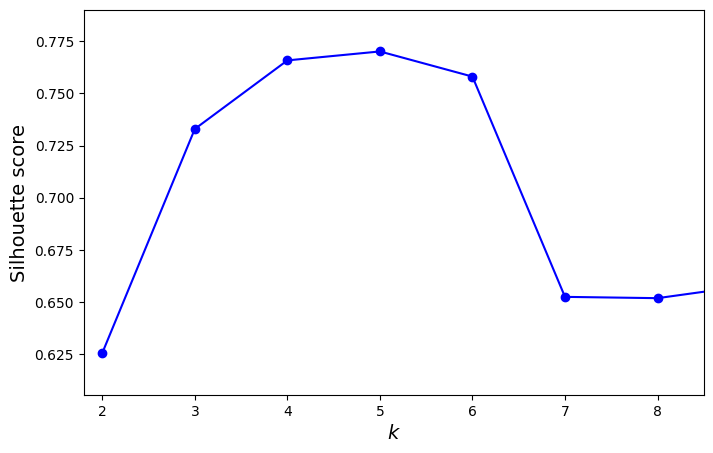

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, n_init = 10, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.axis([1.8, 8.5, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])  # Ajustamos el tamaño del eje y
plt.show()

####Observación:
Se puede verificar que para k=5, el coeficiente de silueta es más cercano a 1. Con k=5 las muestras están mejor agrupadas.

###2.7 Diagramas de silueta para diferentes valores de 'k'
En los diagramas se puede visualizar todos los coeficientes de silueta ordenados por grupos y su valor.

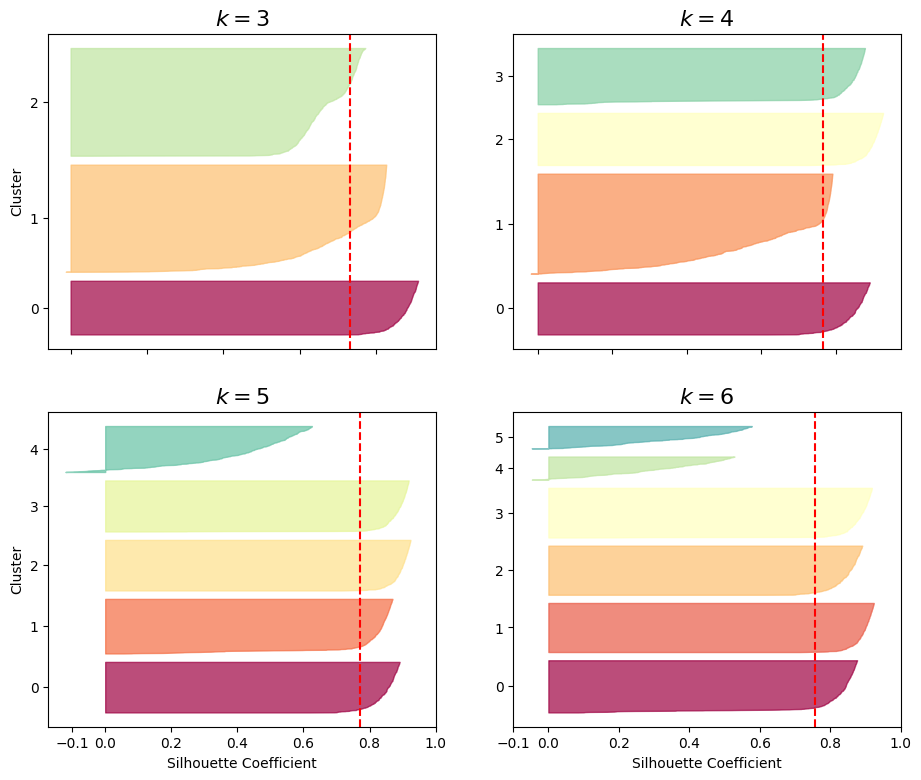

In [23]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

##3. K-Means para aprendizaje semi-supervisado.

Permite entrenar modelos con datasets parcialmente etiquetados.\
Para el entrenamiento se utilizará el mismo dataset de la Sección 2.

In [24]:
# Cargar datos

# Definir X_train, X_test
X_train = df_nuevo_sin_Pollen_analysis.iloc[1:198001, 0:28]

X_test = df_nuevo_sin_Pollen_analysis.iloc[198001:, 0:28]

# Visualizar X_train
print(X_train)

          CS  Density     WC    pH    EC      F      G  Viscosity   Price  \
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02  385.85   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60  639.64   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56  946.46   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44  432.62   
5       2.17     1.35  20.67  4.11  0.75  27.19  43.54    3967.30  593.55   
...      ...      ...    ...   ...   ...    ...    ...        ...     ...   
197996  4.61     1.36  17.79  3.26  0.71  37.83  20.28    4616.43  321.85   
197997  8.02     1.21  18.91  3.40  0.85  34.32  22.09    6257.40  205.34   
197998  1.82     1.74  17.62  5.36  0.71  40.85  32.78    7232.91  842.77   
197999  6.97     1.60  19.66  6.23  0.89  37.97  39.17    6748.91  968.87   
198000  9.34     1.65  12.33  6.68  0.89  24.12  35.73    9148.51  606.29   

        Acacia  ...  Heather  Lavender  Manuka  Orange Blossom  Rosemary  \

###3.1. Entrenamiento del modelo KMeans para k = 10 grupos
Mediante K-Means se encuentra clústeres en los datos de entrenamiento sin etiquetas. Estos clústeres se utilizarán como representaciones de las clases.\
kmeans.fit_transform(X_train): Entrena el modelo K-Means con los datos (X_train) y transforma los datos en distancias a los centroides de los clústeres encontrados. Los resultados se almacenan en X_digits_dist.

In [26]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)        #Crea objeto KMeans con 10 clústeres y una semilla aleatoria
X_digits_dist = kmeans.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Selección de las instancias de datos más representativas de cada clúster
Función np.argmin(X_digits_dist, axis=0): Encuentra el índice del valor mínimo a lo largo del eje especificado (en este caso, el eje 0). Para cada instancia de datos, devuelve el índice del clúster más cercano (es decir, el índice del valor mínimo en X_digits_dist para cada columna).

In [27]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]
print(X_representative_digits)

[[6.18000e+00 1.55000e+00 1.64000e+01 7.49000e+00 8.10000e-01 3.94300e+01
  3.82800e+01 6.14296e+03 5.99010e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [6.53000e+00 1.25000e+00 1.52000e+01 7.37000e+00 7.10000e-01 3.77200e+01
  2.59400e+01 2.77038e+03 5.99010e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [7.60000e+00 1.31000e+00 1.84000e+01 3.44000e+00 7.60000e-01 3.41100e+01
  2.42600e+01 9.56667e+03 5.88340e+02 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e

##Visualización de las imágenes representativas de cada clúster

In [28]:
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 5))
#for index, X_representative_digit in enumerate(X_representative_digits):
  #plt.subplot(5, 10, index+1)
  #plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  #plt.axis('off')
#plt.show()

###Obtención de las etiquetas de las imágenes representativas de cada clúster
Se anotará manualmente estas etiquetas ya que disponemos de dichas etiquetas.

In [29]:
#y_representative_digits = y_train.values[idxs]

In [31]:
import numpy as np

# Definir los valores de las etiquetas manualmente
etiquetas_manual = np.array([0.5, 0.2, 0.8, 0.7, 0.6, 0.3, 1, 0.4, 0.5, 1])

# Crear el array y_representative_digits con los valores de las etiquetas manualmente
y_representative_digits = etiquetas_manual

print(y_representative_digits)

[0.5 0.2 0.8 0.7 0.6 0.3 1.  0.4 0.5 1. ]


###Entrenamiento del Clasificador utilizando las imágenes representativas de los clústeres como datos de entrenamiento
Luego del entrenamiento se evalúa su rendimiento en el conjunto de prueba.

In [35]:
"""
from sklearn.linear_model import LogisticRegression                             #LogisticRegression: Clasificador lineal para clasificación binaria y multiclase.


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)     #Creación del clasificador
                                                                                #multi_class="ovr": Se utiliza la estrategia "one-vs-rest" para problemas de clasificación multiclase.
                                                                                #solver="lbfgs": Algoritmo a utilizar en la optimización. "Limited-memory Broyden–Fletcher–Goldfarb–Shanno".

%time log_reg2.fit(X_representative_digits, y_representative_digits)            #Entrenamiento del clasificador utilizando las imágenes representativas y sus etiquetas
log_reg2.score(X_test, y_test)                                                  #Evaluación del rendimiento del clasificador
"""

'\nfrom sklearn.linear_model import LogisticRegression                             #LogisticRegression: Clasificador lineal para clasificación binaria y multiclase.\n\n\nlog_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)     #Creación del clasificador\n                                                                                #multi_class="ovr": Se utiliza la estrategia "one-vs-rest" para problemas de clasificación multiclase.\n                                                                                #solver="lbfgs": Algoritmo a utilizar en la optimización. "Limited-memory Broyden–Fletcher–Goldfarb–Shanno".\n\n%time log_reg2.fit(X_representative_digits, y_representative_digits)            #Entrenamiento del clasificador utilizando las imágenes representativas y sus etiquetas\nlog_reg2.score(X_test, y_test)                                                  #Evaluación del rendimiento del clasificador\n'

###Observación: No se conoce las etiquetas 'y'. Por tanto, en éste caso no se puede evaluar la precisión.
En la vida real se debe etiquetar manualmente.